In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:/Users/Cold min/Downloads/baseball_players.csv")
data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


Text(0.5, 1.0, 'Label')

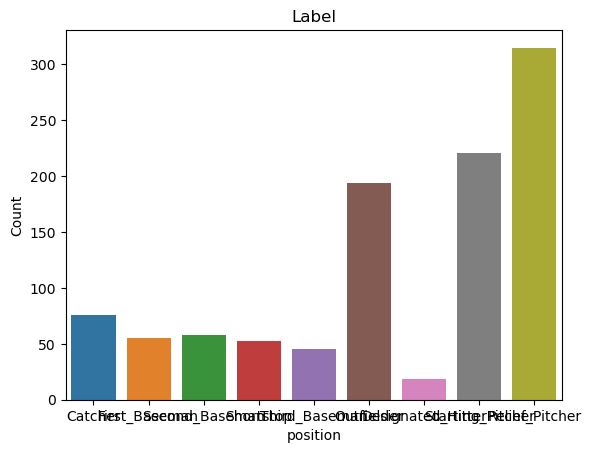

In [8]:
sns.countplot(data = data, x="Position")
plt.xlabel("position")
plt.ylabel("Count")
plt.title("Label")

In [9]:
data.isnull().sum()# 결측치 제거

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Position']=le.fit_transform(data['Position'])
data.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


In [55]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,BAL,0,74,180.0,22.99
1,794,BAL,0,74,215.0,34.69
2,817,BAL,0,72,210.0,30.78
3,628,BAL,2,72,210.0,35.43
4,199,BAL,2,73,188.0,35.71


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Team']=le.fit_transform(data['Team'])
data.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,74,180.0,22.99
1,794,3,0,74,215.0,34.69
2,817,3,0,72,210.0,30.78
3,628,3,2,72,210.0,35.43
4,199,3,2,73,188.0,35.71


<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

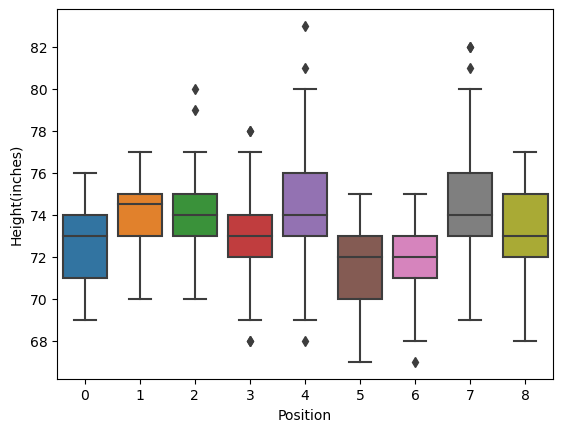

In [57]:
sns.boxplot(x='Position',y='Height(inches)',data=data)

In [59]:
x = data[['Name','Team','Height(inches)','Age']]
x.value_counts()

Name  Team  Height(inches)  Age  
0     28    76              30.15    1
709   24    77              32.56    1
679   9     74              27.94    1
680   5     73              32.01    1
681   19    71              29.73    1
                                    ..
349   0     75              34.67    1
350   8     75              27.22    1
351   25    72              34.87    1
352   6     73              27.01    1
1031  13    74              23.36    1
Length: 1034, dtype: int64

In [60]:
y = data['Position']
y.value_counts()

4    315
7    221
3    194
0     76
5     58
2     55
6     52
8     45
1     18
Name: Position, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1813337660521954


In [68]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.0806407597036514


In [70]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.258584481706155


In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.27988535239762
